## 1. Importación de librerías y configuración

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


## 2. Carga del dataset continuo

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/electricity-load-forecasting")

print("Path to dataset files:", path)

In [95]:
df = pd.read_csv('../data/raw/continuous_dataset.csv', parse_dates=['datetime'], index_col='datetime')
df.sort_index()
df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


## 3. Inspección básica del dataset

In [3]:
'''
Por qué: ver las primeras filas para:

entender qué significa cada columna,

ver si la datetime tiene buen formato,

ver si hay valores raros (NaN, negativos, etc.).

Conclusión típica: “ok, parece demanda horaria + clima + festivos”.
'''
df.head()


,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [4]:
df.info()
'''
Por qué: revisar:

cuántas filas hay (tamaño del dataset),

cuántas columnas,

tipos de datos (números, strings, fechas),

si hay nulos (non-null < entries).

Conclusión típica:

“tenemos ~50k horas de datos (varios años)”

“no hay nulos en nat_demand, así que es usable como target”.
'''


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48048 entries, 2015-01-03 01:00:00 to 2020-06-27 00:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  48048 non-null  float64
 1   T2M_toc     48048 non-null  float64
 2   QV2M_toc    48048 non-null  float64
 3   TQL_toc     48048 non-null  float64
 4   W2M_toc     48048 non-null  float64
 5   T2M_san     48048 non-null  float64
 6   QV2M_san    48048 non-null  float64
 7   TQL_san     48048 non-null  float64
 8   W2M_san     48048 non-null  float64
 9   T2M_dav     48048 non-null  float64
 10  QV2M_dav    48048 non-null  float64
 11  TQL_dav     48048 non-null  float64
 12  W2M_dav     48048 non-null  float64
 13  Holiday_ID  48048 non-null  int64  
 14  holiday     48048 non-null  int64  
 15  school      48048 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 6.2 MB


'\nPor qué: revisar:\n\ncuántas filas hay (tamaño del dataset),\n\ncuántas columnas,\n\ntipos de datos (números, strings, fechas),\n\nsi hay nulos (non-null < entries).\n\nConclusión típica:\n\n“tenemos ~50k horas de datos (varios años)”\n\n“no hay nulos en nat_demand, así que es usable como target”.\n'

In [5]:
df.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000
mean,1182.868647,27.399111,0.018313,0.079979,13.391049,26.921023,0.017844,0.106265,7.046675,24.719513,0.016867,0.144681,3.567589,0.704795,0.062937,0.727793
std,192.068896,1.675462,0.001607,0.065589,7.295502,3.018129,0.001889,0.086293,4.103711,2.414019,0.001584,0.087899,1.710522,3.147470,0.242852,0.445100
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010247,0.000009,0.060394,19.933740,0.009655,0.000032,0.015497,0.000000,0.000000,0.000000
25%,1020.056900,26.160455,0.017236,0.026451,7.544958,24.769281,0.016584,0.036819,3.955051,22.954652,0.015800,0.075775,2.298887,0.000000,0.000000,0.000000
50%,1168.427700,27.118051,0.018590,0.065201,12.182103,26.167352,0.018351,0.085968,5.992762,24.001718,0.017167,0.130188,3.413994,0.000000,0.000000,1.000000
75%,1327.563950,28.558344,0.019521,0.117310,18.661282,28.712335,0.019242,0.157288,9.409871,26.243402,0.018067,0.200012,4.670628,0.000000,0.000000,1.000000
max,1754.882000,35.039575,0.022690,0.521240,39.229726,39.063440,0.022165,0.484985,24.483937,34.216211,0.021066,0.477783,10.288902,22.000000,1.000000,1.000000


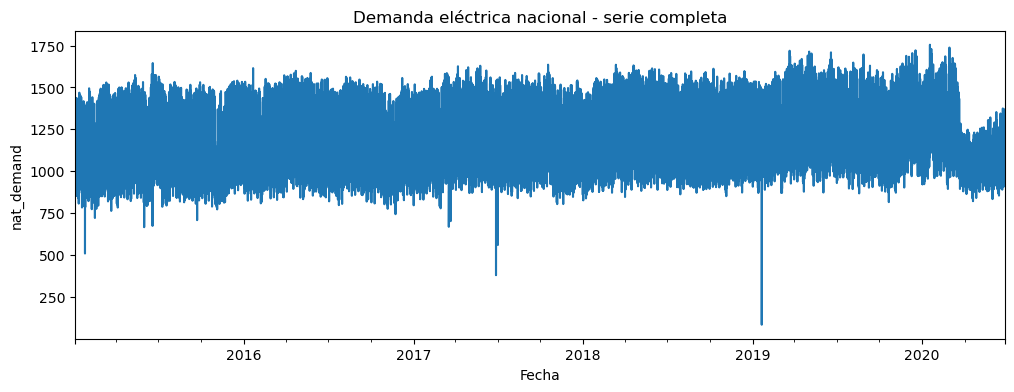

In [7]:
plt.figure(figsize=(12,4))
df['nat_demand'].plot()
plt.title('Demanda eléctrica nacional - serie completa')
plt.ylabel('nat_demand')
plt.xlabel('Fecha')
plt.show()

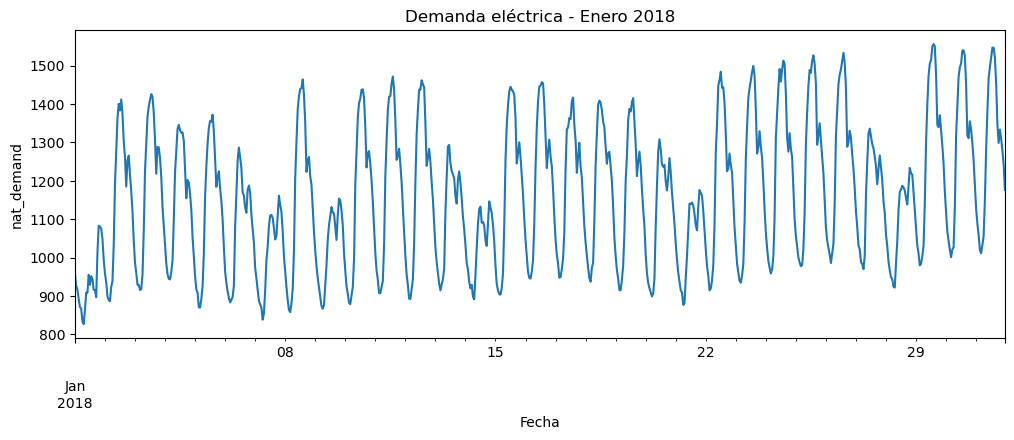

In [ ]:
# Reconstruimo un mes
plt.figure(figsize=(12,4))
df['2018-01-01':'2018-01-31']['nat_demand'].plot()
plt.title('Demanda eléctrica - Enero 2018')
plt.ylabel('nat_demand')
plt.xlabel('Fecha')
plt.show()

<Axes: xlabel='datetime'>

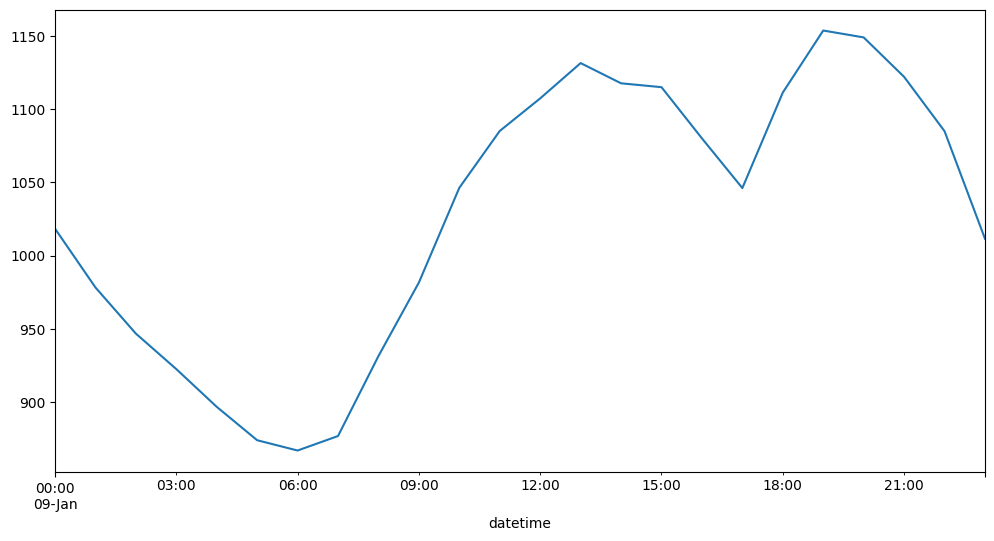

In [ ]:
# Reconstruimos un dia
plt.figure(figsize=(12, 6))
df['2018-01-09':'2018-01-09']['nat_demand'].plot()

<Axes: xlabel='datetime'>

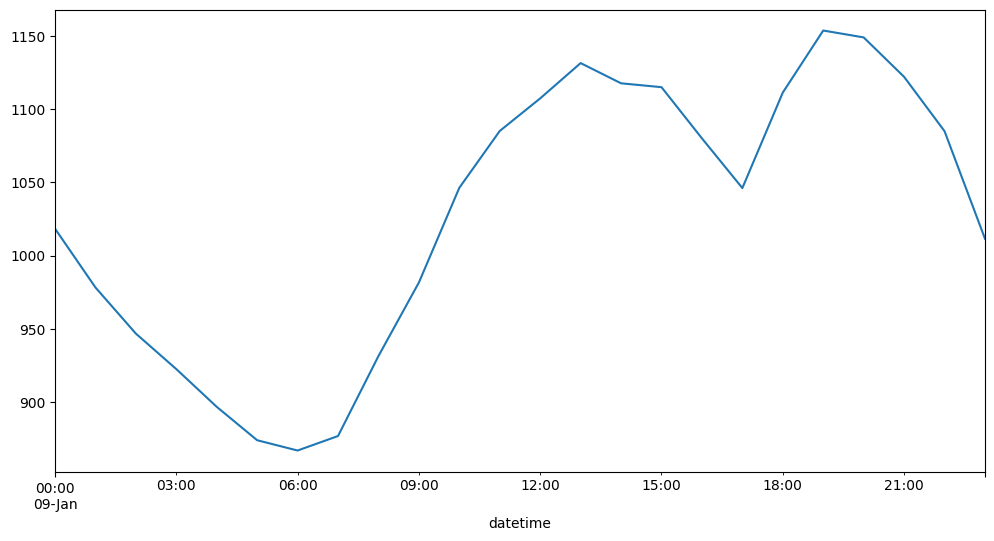

In [ ]:
# Reconstruimos un dia tipico 

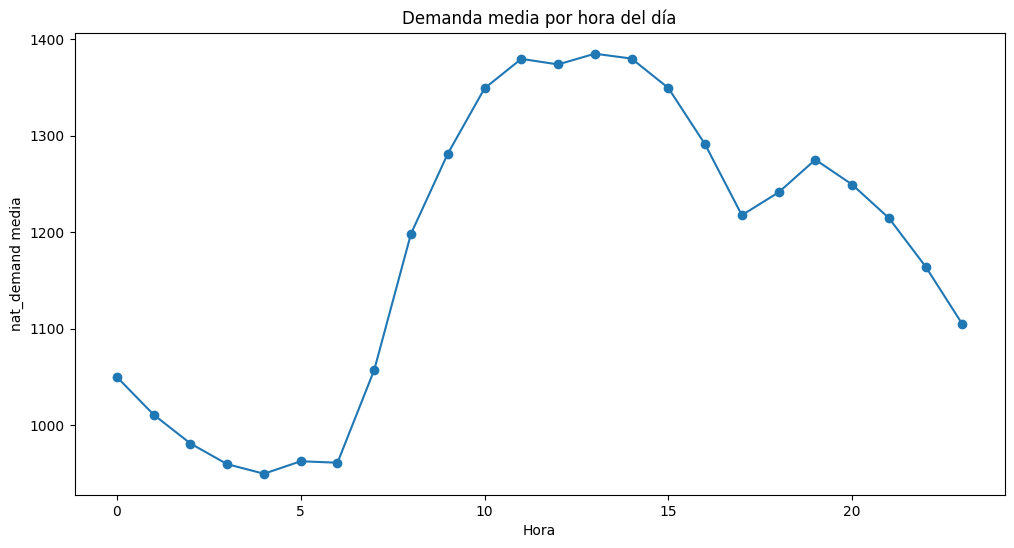

In [67]:
df['hora'] = df.index.hour
perfil_horario = df.groupby('hora')['nat_demand'].mean()

perfil_horario.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Demanda media por hora del día')
plt.xlabel('Hora')
plt.ylabel('nat_demand media')
plt.show()

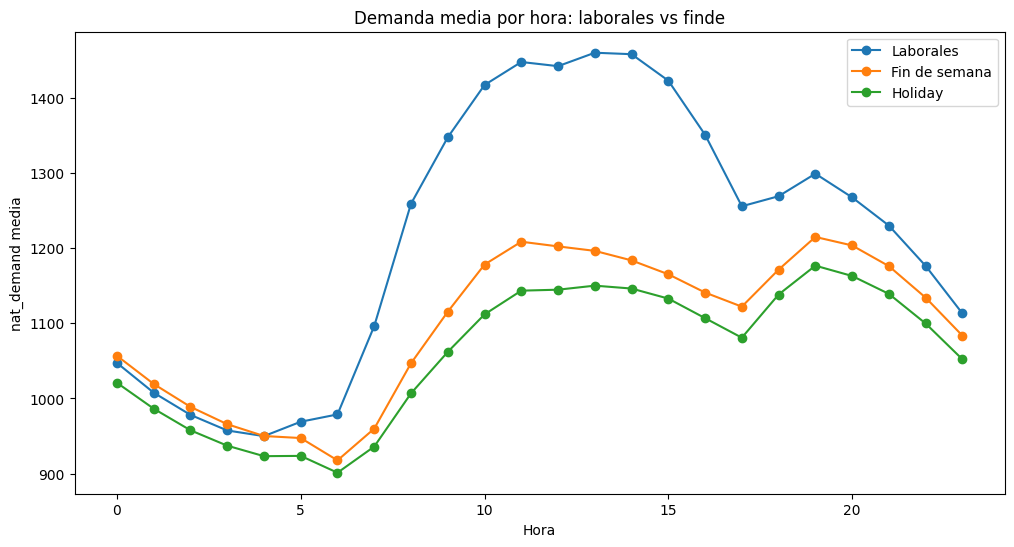

In [66]:
df['dayofweek'] = df.index.day_of_week
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# Perfil horario de días laborales
perfil_weekday = df[df['is_weekend'] == 0].groupby('hora')['nat_demand'].mean()
# Perfil horario de fines de semana
perfil_weekend = df[df['is_weekend'] == 1].groupby('hora')['nat_demand'].mean()
perfil_holiday = df[df['holiday'] == 1].groupby('hora')['nat_demand'].mean()


plt.figure(figsize=(12,6))
perfil_weekday.plot(marker='o', label='Laborales')
perfil_weekend.plot(marker='o', label='Fin de semana')
perfil_holiday.plot(marker='o', label='Holiday')

plt.title('Demanda media por hora: laborales vs finde')
plt.xlabel('Hora')
plt.ylabel('nat_demand media')
plt.legend()
plt.show()

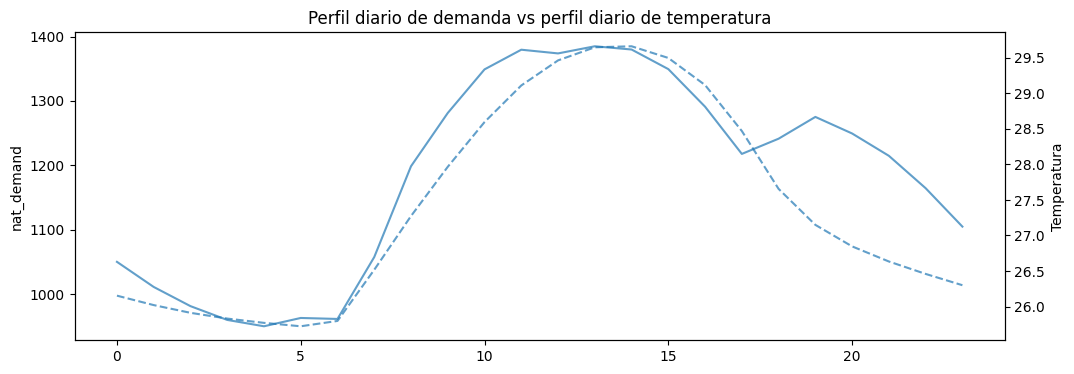

In [86]:
perfil_horario_temp = df.groupby('hora')['T2M_toc'].mean()
perfil_horario_demand = df.groupby('hora')['nat_demand'].mean()

fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(perfil_horario_demand, label='Demanda', alpha=0.7)
ax1.set_ylabel('nat_demand')

ax2 = ax1.twinx()
ax2.plot(perfil_horario_temp, label='T2M_toc (temp)', alpha=0.7, linestyle='--')
ax2.set_ylabel('Temperatura')

plt.title('Perfil diario de demanda vs perfil diario de temperatura')
plt.show()

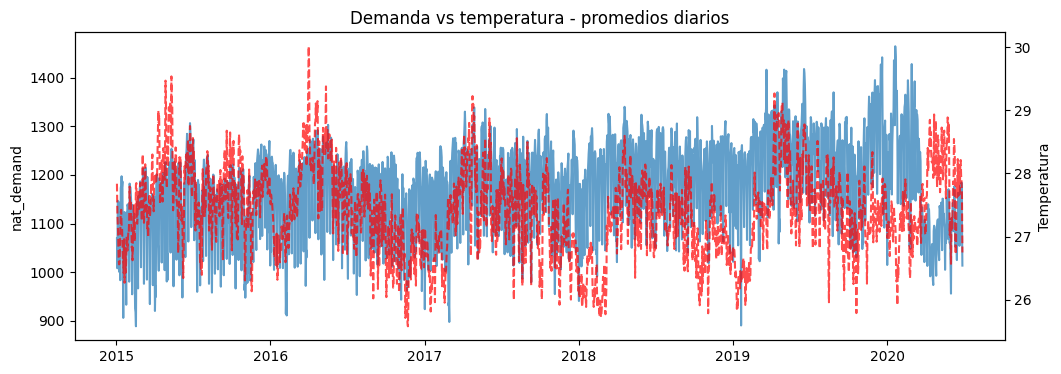

In [81]:
import matplotlib.pyplot as plt

# Promedios diarios de demanda y temperatura
daily = df.resample('D').mean()

fig, ax1 = plt.subplots(figsize=(12,4))

ax1.plot(daily.index, daily['nat_demand'], label='Demanda', alpha=0.7)
ax1.set_ylabel('nat_demand')

ax2 = ax1.twinx()
ax2.plot(daily.index, daily['T2M_toc'], label='T2M_toc (temp)', alpha=0.7, linestyle='--', color='red')
ax2.set_ylabel('Temperatura')

plt.title('Demanda vs temperatura - promedios diarios')
plt.show()


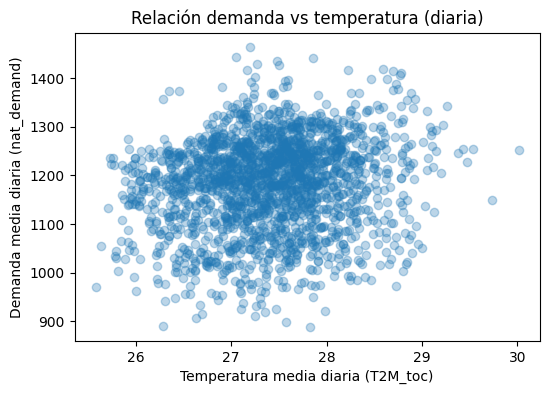

In [84]:
plt.figure(figsize=(6,4))
plt.scatter(daily['T2M_toc'], daily['nat_demand'], alpha=0.3)
plt.xlabel('Temperatura media diaria (T2M_toc)')
plt.ylabel('Demanda media diaria (nat_demand)')
plt.title('Relación demanda vs temperatura (diaria)')
plt.show()


In [92]:
df[['T2M_toc', 'T2M_san', 'T2M_dav']].describe()

,T2M_toc,T2M_san,T2M_dav
count,48048.000000,48048.000000,48048.000000
mean,27.399111,26.921023,24.719513
std,1.675462,3.018129,2.414019
min,22.953455,19.765222,19.933740
25%,26.160455,24.769281,22.954652
50%,27.118051,26.167352,24.001718
75%,28.558344,28.712335,26.243402
max,35.039575,39.063440,34.216211


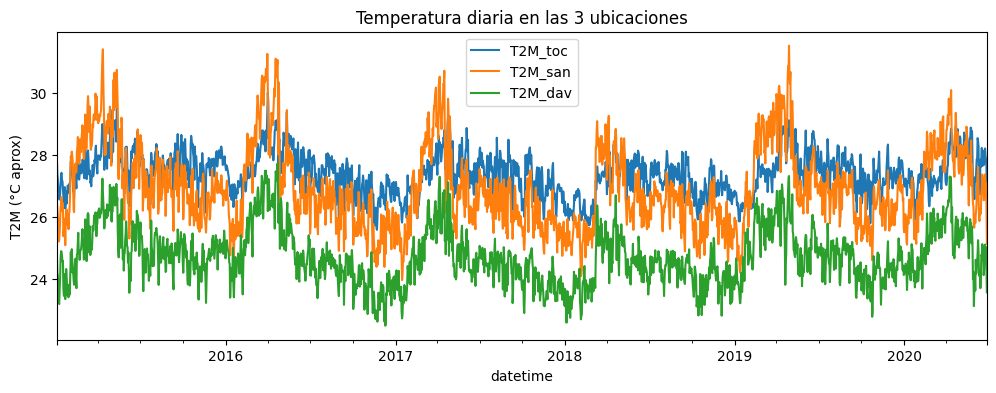

In [94]:
daily_temp = df[['T2M_toc', 'T2M_san', 'T2M_dav']].resample('D').mean()

daily_temp.plot(figsize=(12,4))
plt.title('Temperatura diaria en las 3 ubicaciones')
plt.ylabel('T2M (°C aprox)')
plt.show()


In [89]:
num_cols = [
    'nat_demand',
    'T2M_toc','QV2M_toc','TQL_toc','W2M_toc',
    'T2M_san','QV2M_san','TQL_san','W2M_san',
    'T2M_dav','QV2M_dav','TQL_dav','W2M_dav'
]

corr_with_nat = df[num_cols].corr()['nat_demand'].sort_values(ascending=False)
corr_with_nat


nat_demand    1.000000
T2M_toc       0.652811
T2M_dav       0.648279
T2M_san       0.627024
W2M_san       0.191796
TQL_san       0.119038
W2M_toc       0.098435
TQL_toc       0.073109
TQL_dav       0.042037
QV2M_san      0.022172
QV2M_dav     -0.002117
QV2M_toc     -0.036706
W2M_dav      -0.054802
Name: nat_demand, dtype: float64

In [90]:
df['Holiday_ID'].value_counts()


Holiday_ID
0     45024
12      168
2       144
4       144
5       144
6       144
3       144
7       144
8       144
10      144
9       144
11      144
1       144
19      144
16      144
21      144
15      120
13      120
14      120
18      120
17      120
20      120
22      120
Name: count, dtype: int64

## Resumen del análisis exploratorio (EDA)

### 1. Estructura del dataset

- **Fuente:** Electricity Load Forecasting (Kaggle).
- **Frecuencia temporal:** datos horarios.
- **Rango temporal:** de `2015-01-03 01:00` a `2020-06-27 00:00` (≈ 5,5 años).
- **Tamaño:** 48.048 filas y 16 columnas numéricas (índice = `datetime`).
- **Calidad:** no se encontraron valores nulos ni timestamps duplicados.

Columnas principales:
- `nat_demand`: demanda eléctrica nacional (target).
- Variables meteorológicas en 3 ubicaciones (`toc`, `san`, `dav`):  
  `T2M_*` (temperatura), `QV2M_*` (humedad específica),  
  `TQL_*` (agua líquida/nubosidad), `W2M_*` (viento).
- Variables de calendario: `Holiday_ID`, `holiday` (0/1), `school` (0/1).

---

### 2. Comportamiento de la demanda (`nat_demand`)

Estadísticos básicos:

- Media ≈ **1183**
- Desviación estándar ≈ **192**
- Mínimo ≈ **85**
- Máximo ≈ **1755**

Interpretación:
- La demanda hora a hora suele moverse aproximadamente entre **1000 y 1400**.
- Existen algunos **outliers hacia abajo** (posibles eventos especiales o errores), pero en general el rango es razonable.

En la serie completa se observa:
- Una serie relativamente estable alrededor de la media, sin tendencia fuerte.
- Variaciones constantes (“ola” continua) + algunos puntos muy bajos aislados.

En el zoom de un mes (ej. enero 2018) se ve claramente:
- **Estacionalidad diaria**: cada día la curva baja de madrugada, sube durante el día y vuelve a bajar por la noche.
- Diferencias entre días que apuntan a un **efecto semanal** (algunos días sistemáticamente más altos que otros).

El perfil medio por hora del día muestra:
- Mínimos entre ~0–5 h.
- Subida rápida a partir de las 6–7 h.
- Pico principal entre ~10–14 h.
- Segunda panza por la tarde–noche.
  
Conclusión: hay un patrón diario muy marcado que el modelo debe capturar.

---

### 3. Efectos de calendario

Se construyeron variables:
- `hour` / `hora` = hora del día (0–23).
- `dayofweek` = día de la semana (0=lunes, …, 6=domingo).
- `is_weekend` = 1 si sábado o domingo, 0 en caso contrario.

Perfil medio por hora para:
- **Días laborales**,
- **Fines de semana**,
- **Feriados (`holiday=1`)**.

Resultados:
- La **forma diaria** es similar en los tres casos (baja de madrugada, pico diurno, etc.).
- El **nivel** cambia:
  - Laborales > Fines de semana > Feriados.
  - La diferencia es especialmente grande en horas centrales (≈ 8–17 h).
- `Holiday_ID` muestra muchas categorías poco frecuentes, por lo que se usa por ahora solo `holiday` (0/1) como indicador de feriado.
- `school` indica días lectivos, complementando la información de calendario.

Conclusión: las variables de calendario (`hour`, `dayofweek`, `is_weekend`, `holiday`, `school`) son muy relevantes y deben incluirse como features.

---

### 4. Efectos del clima

Comparación de temperaturas:
- `T2M_toc`, `T2M_san`, `T2M_dav` tienen patrones anuales muy similares.
- Rango aproximado: 20–39 ºC, con diferencias de nivel entre ubicaciones.

Correlación con `nat_demand`:

- `T2M_toc` ≈ **0.65**
- `T2M_dav` ≈ **0.65**
- `T2M_san` ≈ **0.63**
- Viento (`W2M_*`): correlaciones débiles (≈ 0.1–0.2).
- Nubosidad (`TQL_*`) y humedad (`QV2M_*`): correlaciones muy bajas o casi nulas.

Perfil diario demanda vs temperatura:
- A lo largo del día, demanda y temperatura **suben y bajan casi al mismo tiempo**:
  - mínimas de madrugada,
  - máximos en las horas centrales del día.

Scatter diario demanda vs temperatura:
- Relación positiva pero con bastante dispersión: la temperatura ayuda, pero no explica toda la variabilidad.

Conclusión: **la temperatura es la variable climática más importante**; viento, nubosidad y humedad tienen un efecto mucho menor.

---

### 5. Decisiones de modelado basadas en el EDA

A partir de este análisis se decide que, para el primer modelo LSTM de forecasting de demanda:

1. **Target**
   - `nat_demand` (demanda eléctrica nacional).

2. **Features de entrada principales**
   - Historial de `nat_demand` dentro de la ventana (lags implícitos).
   - Temperatura en las 3 ubicaciones: `T2M_toc`, `T2M_san`, `T2M_dav`
     (o alguna combinación/prome dio, dado que las tres están fuertemente correlacionadas con la demanda).
   - Variables de calendario:
     - `hour` / `hora`
     - `dayofweek`
     - `is_weekend`
     - `holiday`
     - `school`

3. **Justificación**
   - El patrón diario y semanal de la demanda es muy fuerte → se necesitan variables de calendario.
   - La temperatura tiene alta correlación con la demanda y perfiles diarios similares → es la covariable climática clave.
   - Otras variables climáticas (viento, nubosidad, humedad) muestran correlaciones bajas, por lo que se dejan fuera del modelo inicial para simplificar y evitar ruido.

Este EDA sirve como base para el notebook de **preparación de datos y creación de ventanas** para el LSTM, y documenta por qué se eligieron estas variables y no otras.
